#Sprint 1- Using Predefined Models

##Import Necessory Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score,confusion_matrix

##Load the dataset

In [ ]:
#Dataset Reading
dataset=pd.read_csv('cardio_train.csv',sep=';')
dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
dataset.shape

(70000, 13)

In [ ]:
#Dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
dataset.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
#Check null values
dataset.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#Check Duplicate Values
dataset.duplicated().sum()

0

In [ ]:
#convert ages from days to years
dataset["age"]=(dataset["age"]/365).values.astype(int)
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

##Visualization

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>,
        <Axes: title={'center': 'cholesterol'}>],
       [<Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>,
        <Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>],
       [<Axes: title={'center': 'cardio'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

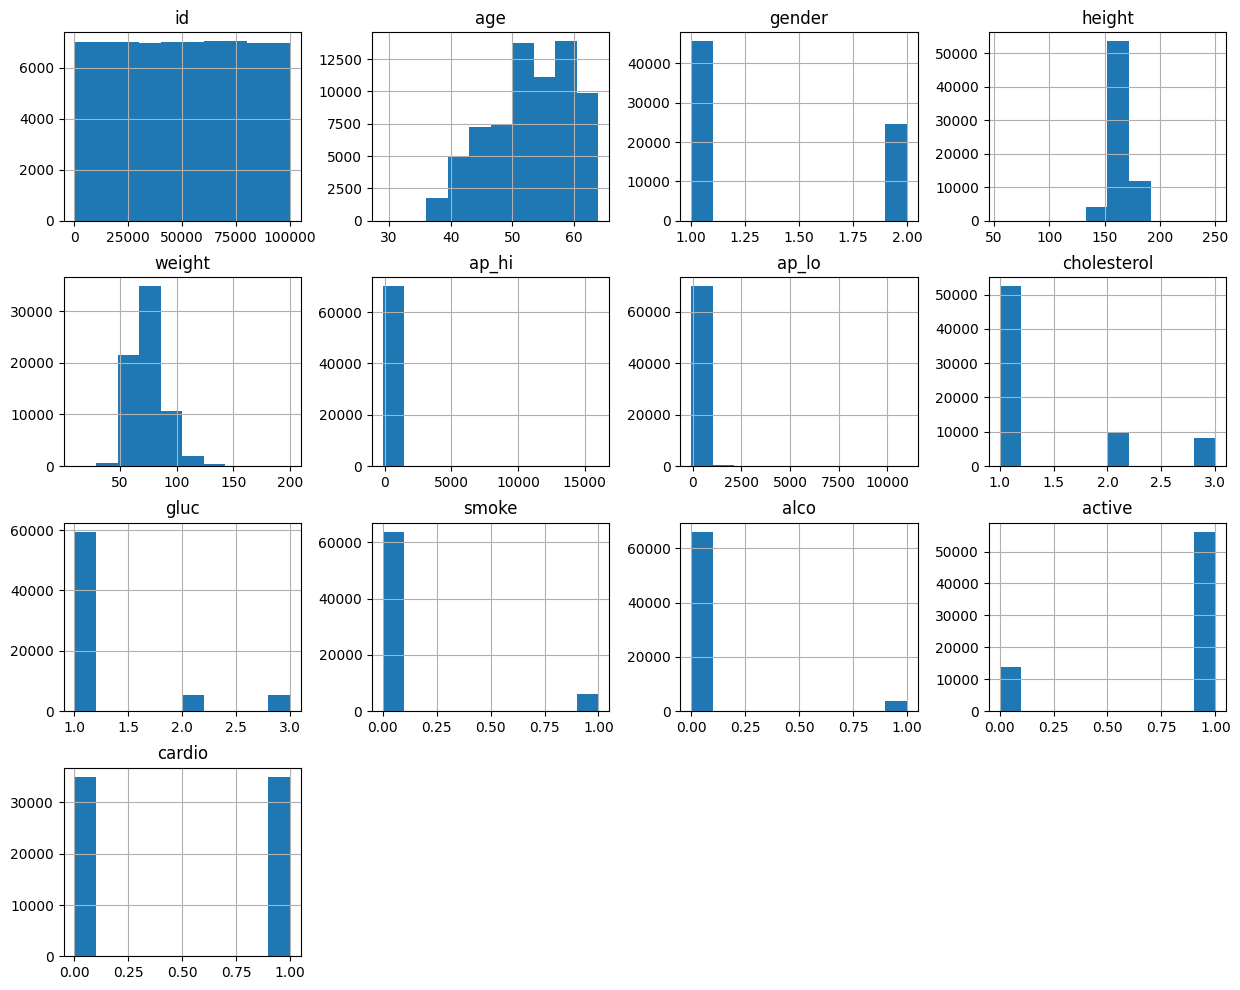

In [ ]:
dataset.hist(figsize=(15,12))

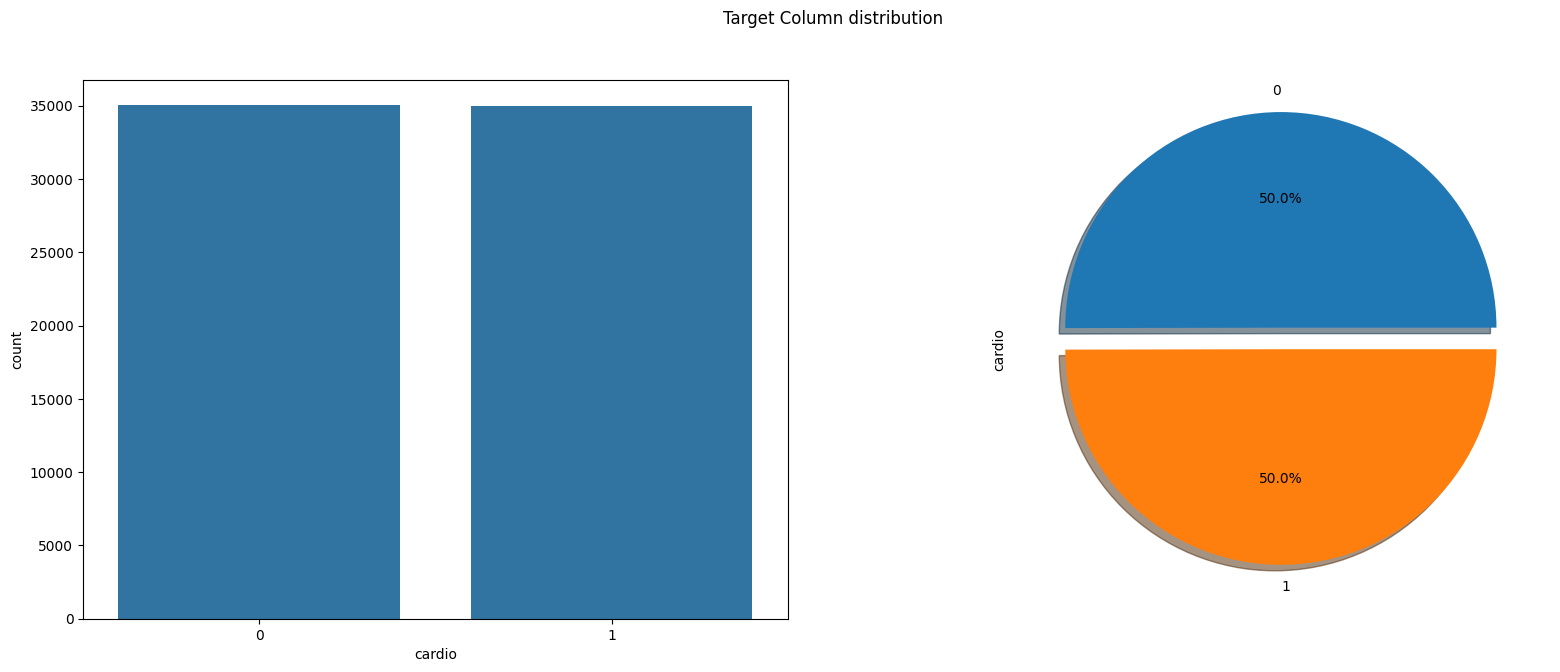

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=dataset, x="cardio", ax=ax[0])
dataset["cardio"].value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%", labels=["0", "1"], shadow=True, ax=ax[1])
fig.suptitle("Target Column distribution")

plt.show()

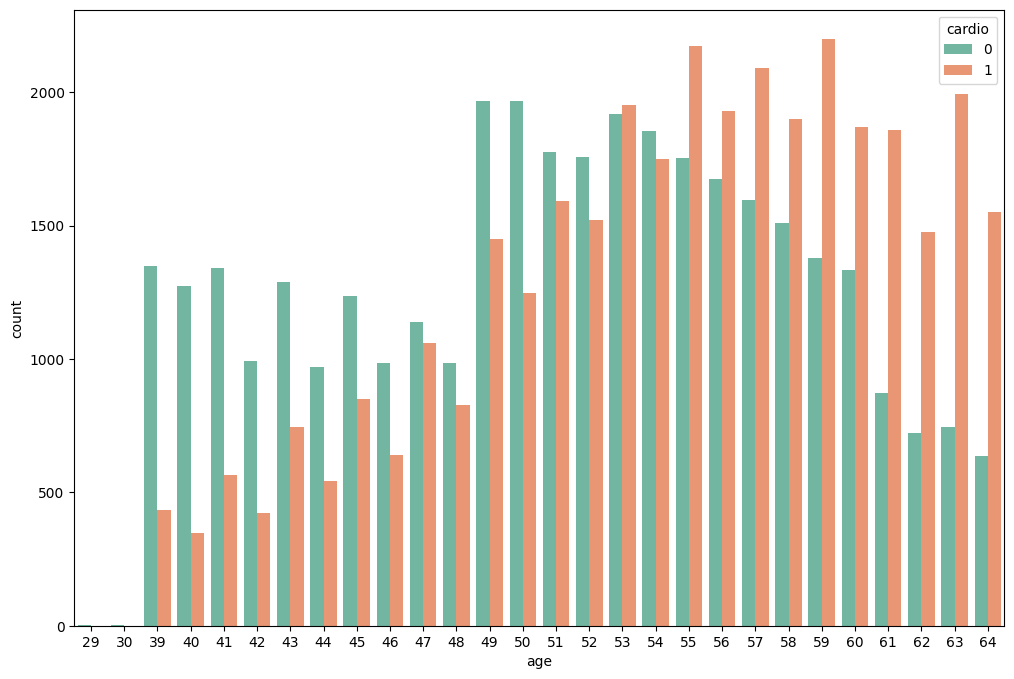

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 8
sns.countplot(x='age', hue='cardio', data = dataset, palette="Set2");

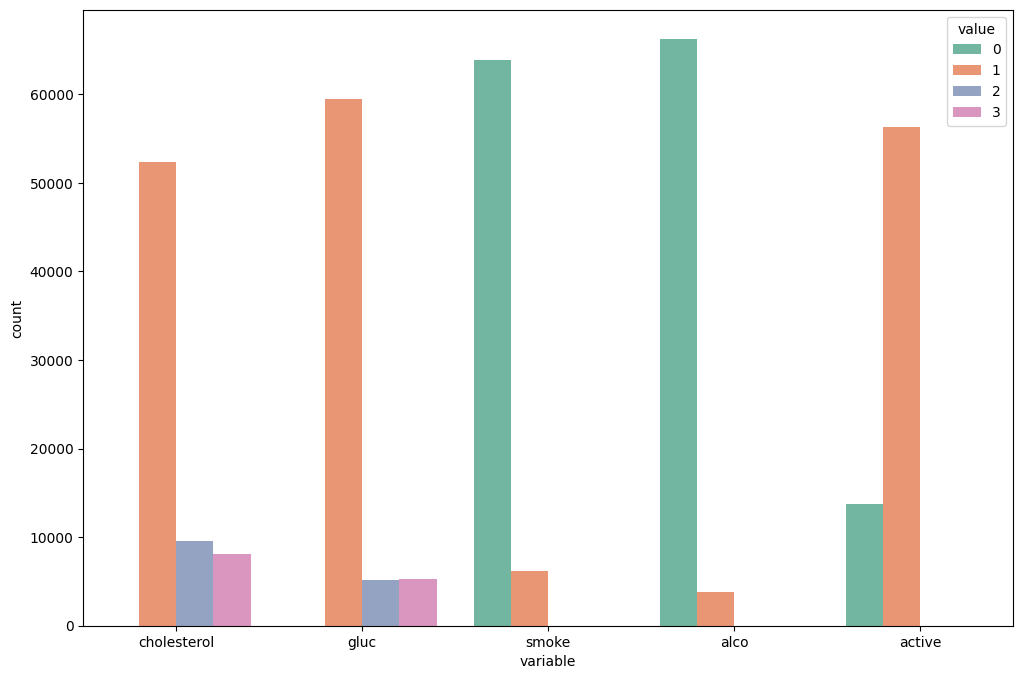

In [ ]:
df_categorical = dataset.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value", data=pd.melt(df_categorical), palette="Set2");

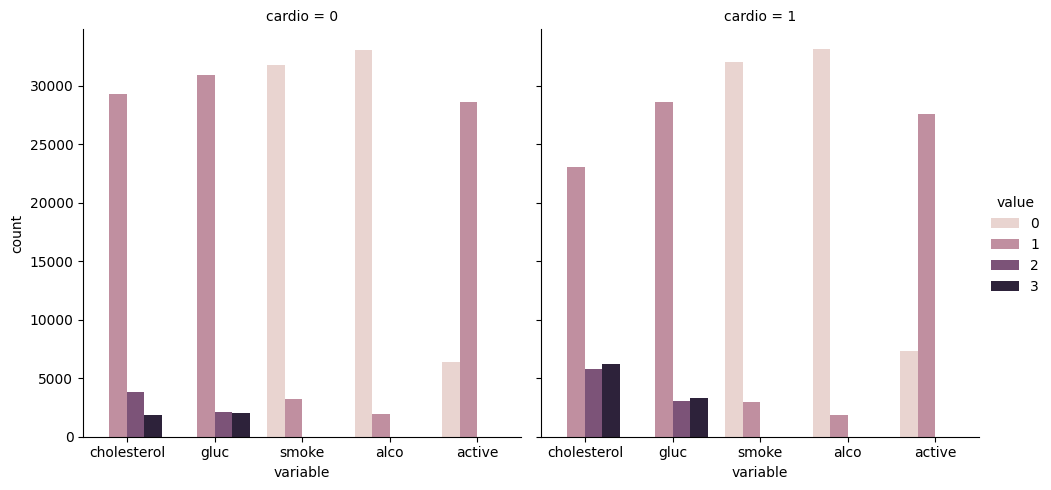

In [ ]:
df_long = pd.melt(dataset, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

<Axes: >

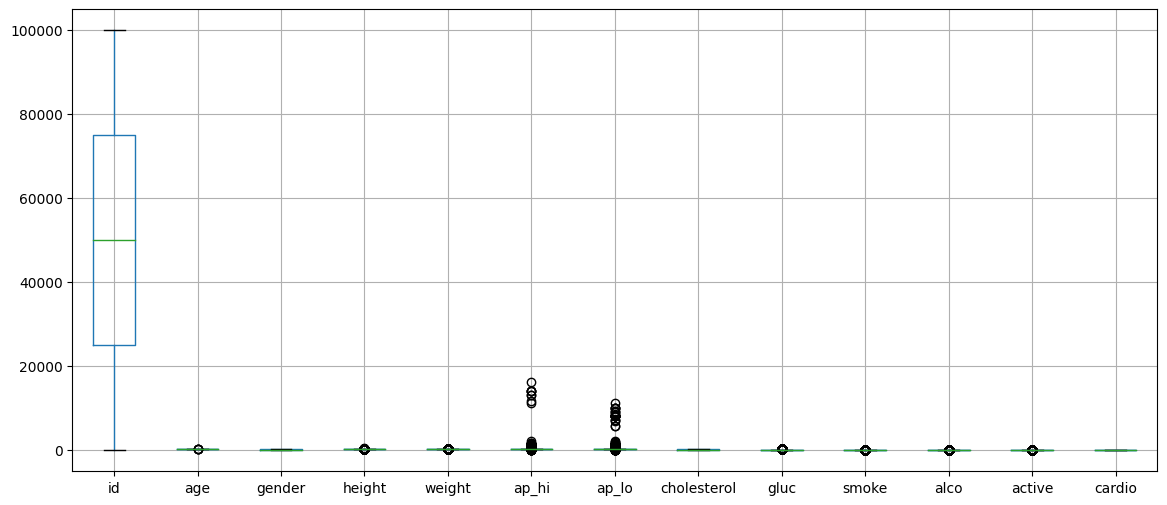

In [ ]:
dataset.boxplot(figsize=(14,6))

<Axes: >

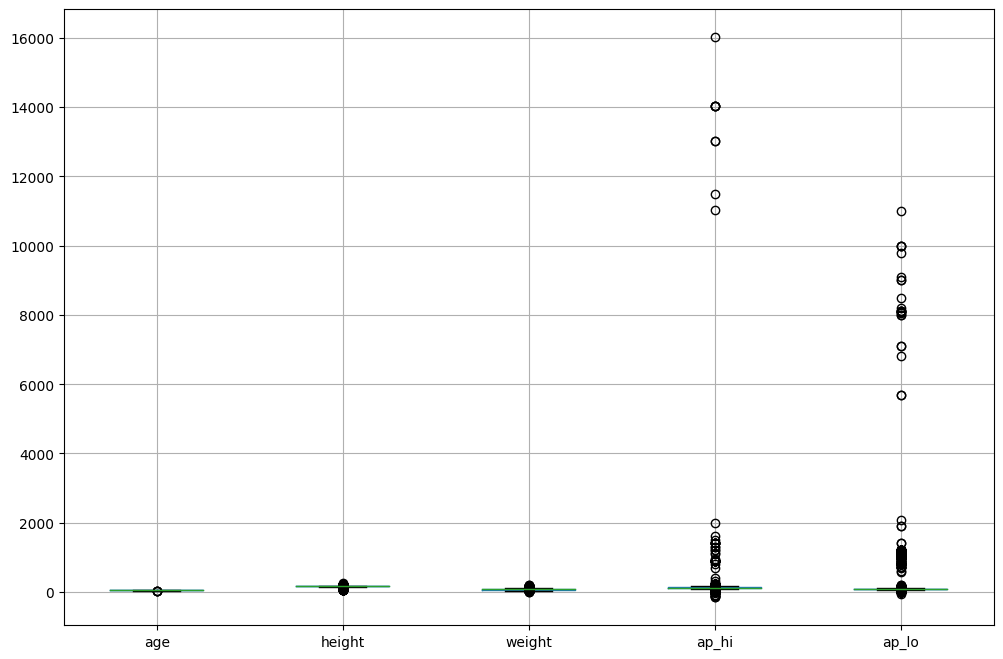

In [ ]:
dataset[["age","height","weight","ap_hi","ap_lo"]].boxplot()

##Dataset Preprocessing

In [ ]:
#Remove Id
dataset.drop("id",axis=1,inplace=True)

<Axes: >

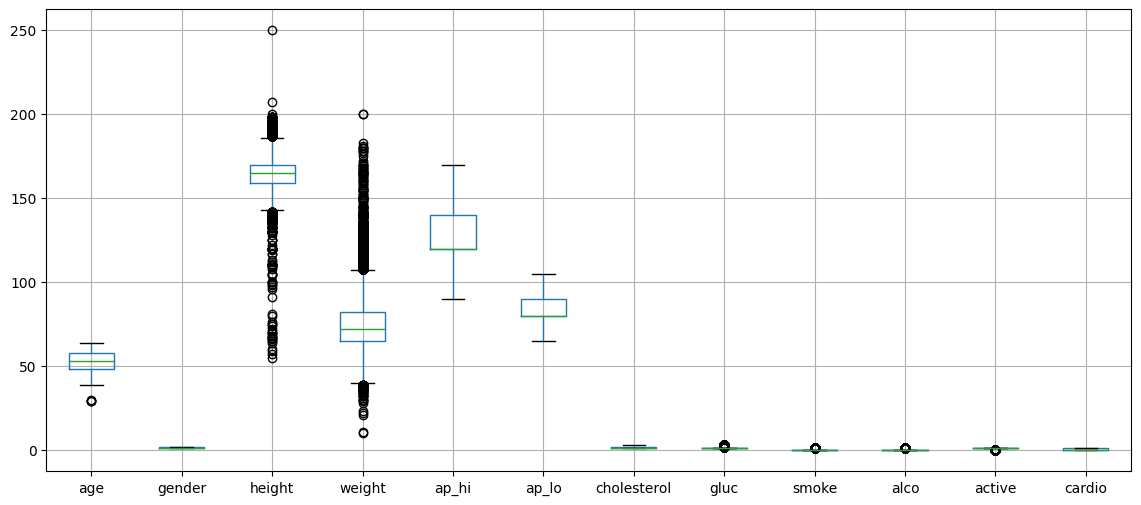

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with columns 'ap_hi' and 'ap_lo'

# Calculate the IQR for ap_hi and ap_lo
Q1_hi = dataset['ap_hi'].quantile(0.25)
Q3_hi = dataset['ap_hi'].quantile(0.75)
IQR_hi = Q3_hi - Q1_hi

Q1_lo = dataset['ap_lo'].quantile(0.25)
Q3_lo = dataset['ap_lo'].quantile(0.75)
IQR_lo = Q3_lo - Q1_lo

# Define the upper and lower bounds for outliers
upper_bound_hi = Q3_hi + 1.5 * IQR_hi
lower_bound_hi = Q1_hi - 1.5 * IQR_hi

upper_bound_lo = Q3_lo + 1.5 * IQR_lo
lower_bound_lo = Q1_lo - 1.5 * IQR_lo

# Identify and filter out outliers
outliers_hi = (dataset['ap_hi'] > upper_bound_hi) | (dataset['ap_hi'] < lower_bound_hi)
outliers_lo = (dataset['ap_lo'] > upper_bound_lo) | (dataset['ap_lo'] < lower_bound_lo)

# Replace outliers with the median (you can choose a different strategy based on your analysis)
dataset.loc[outliers_hi, 'ap_hi'] = dataset['ap_hi'].median()
dataset.loc[outliers_lo, 'ap_lo'] = dataset['ap_lo'].median()
dataset.boxplot(figsize=(14,6))

<Axes: >

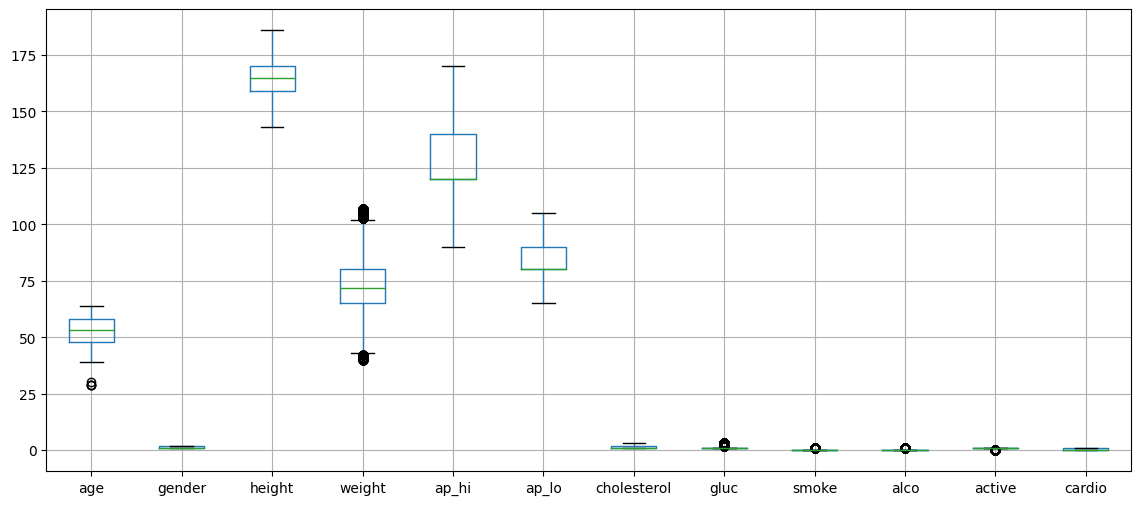

In [ ]:
# Calculate the IQR for height, and weight

Q1_height = dataset['height'].quantile(0.25)
Q3_height = dataset['height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

Q1_weight = dataset['weight'].quantile(0.25)
Q3_weight = dataset['weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

upper_bound_height = Q3_height + 1.5 * IQR_height
lower_bound_height = Q1_height - 1.5 * IQR_height

upper_bound_weight = Q3_weight + 1.5 * IQR_weight
lower_bound_weight = Q1_weight - 1.5 * IQR_weight

# Identify and filter out outliers for height, and weight
outliers_height = (dataset['height'] > upper_bound_height) | (dataset['height'] < lower_bound_height)
outliers_weight = (dataset['weight'] > upper_bound_weight) | (dataset['weight'] < lower_bound_weight)

# Replace outliers with the median (you can choose a different strategy based on your analysis)
dataset.loc[outliers_height, 'height'] = dataset['height'].median()
dataset.loc[outliers_weight, 'weight'] = dataset['weight'].median()

dataset.boxplot(figsize=(14,6))

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>],
       [<Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>]], dtype=object)

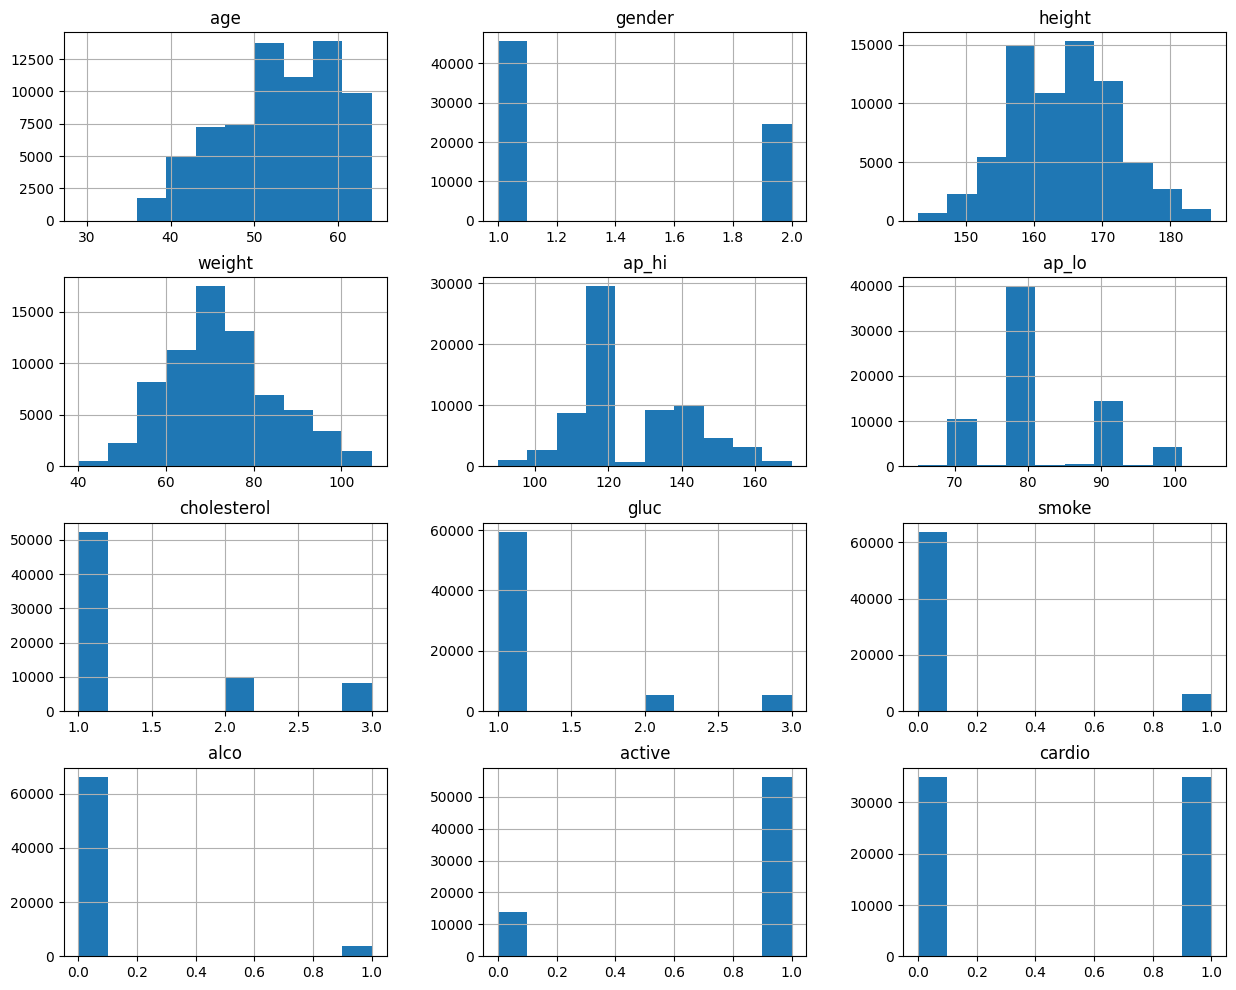

In [ ]:
dataset.hist(figsize=(15,12))

<Axes: >

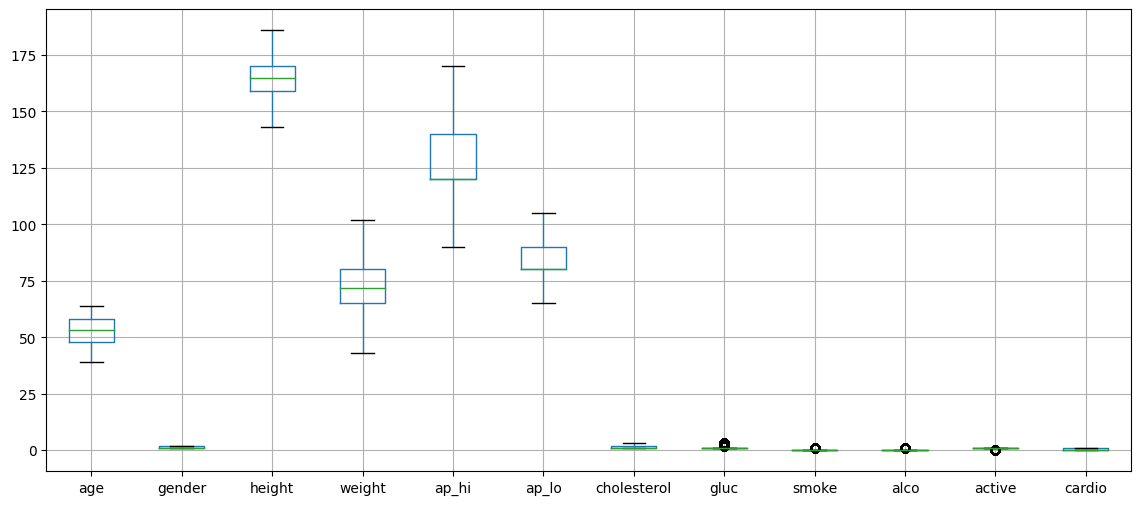

In [ ]:
# Calculate the IQR for age, height, and weight
Q1_age = dataset['age'].quantile(0.25)
Q3_age = dataset['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

Q1_weight = dataset['weight'].quantile(0.25)
Q3_weight = dataset['weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

# Define the upper and lower bounds for outliers
upper_bound_age = Q3_age + 1.5 * IQR_age
lower_bound_age = Q1_age - 1.5 * IQR_age

upper_bound_weight = Q3_weight + 1.5 * IQR_weight
lower_bound_weight = Q1_weight - 1.5 * IQR_weight

# Identify and filter out outliers for age and weight
outliers_age = (dataset['age'] > upper_bound_age) | (dataset['age'] < lower_bound_age)
outliers_weight = (dataset['weight'] > upper_bound_weight) | (dataset['weight'] < lower_bound_weight)

# Replace outliers with the median (you can choose a different strategy based on your analysis)
dataset.loc[outliers_age, 'age'] = dataset['age'].median()
dataset.loc[outliers_weight, 'weight'] = dataset['weight'].median()
dataset.boxplot(figsize=(14,6))

In [ ]:
dataset["bmi"] = np.round(dataset.weight/(dataset.height/100)**2,2)
print(dataset.shape)
dataset.head(10)

(70000, 13)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,47,1,156,56.0,100,80,1,1,0,0,0,0,23.01
5,60,1,151,67.0,120,80,2,2,0,0,0,0,29.38
6,60,1,157,93.0,130,80,3,1,0,0,1,0,37.73
7,61,2,178,95.0,130,90,3,3,0,0,1,1,29.98
8,48,1,158,71.0,110,70,1,1,0,0,1,0,28.44
9,54,1,164,68.0,110,80,1,1,0,0,0,0,25.28


<Axes: >

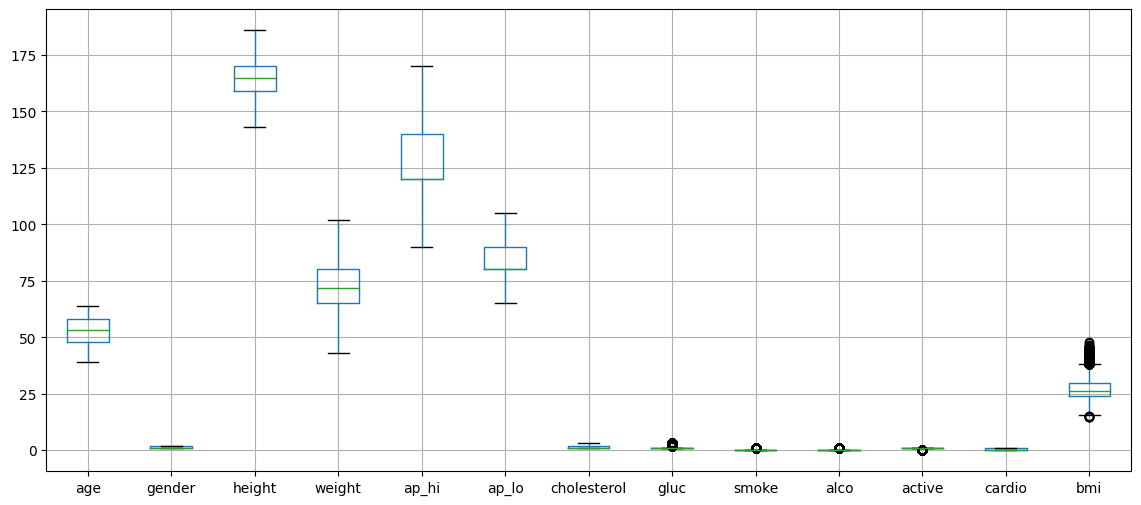

In [ ]:
dataset.boxplot(figsize=(14,6))

In [ ]:
dataset.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
dtype: int64

In [ ]:
#Correlation Matrix
corr=dataset.corr().style.background_gradient(cmap='gray')
corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
age,1.000000,-0.022962,-0.086881,0.066349,0.206189,0.144332,0.153958,0.098343,-0.047727,-0.029814,-0.009903,0.237867,0.117605
gender,-0.022962,1.000000,0.524302,0.159867,0.059886,0.050392,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.147058
height,-0.086881,0.524302,1.000000,0.294060,0.020783,0.015567,-0.056720,-0.021675,0.196219,0.096770,-0.007778,-0.012566,-0.285253
weight,0.066349,0.159867,0.294060,1.000000,0.230339,0.196623,0.119898,0.081877,0.061821,0.060239,-0.012649,0.165734,0.828167
ap_hi,0.206189,0.059886,0.020783,0.230339,1.000000,0.624512,0.189022,0.086501,0.023740,0.029870,0.002405,0.428286,0.219571
ap_lo,0.144332,0.050392,0.015567,0.196623,0.624512,1.000000,0.156604,0.068642,0.021394,0.033166,-0.000906,0.331357,0.188176
cholesterol,0.153958,-0.035821,-0.056720,0.119898,0.189022,0.156604,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.153887
gluc,0.098343,-0.020491,-0.021675,0.081877,0.086501,0.068642,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.095015
smoke,-0.047727,0.338135,0.196219,0.061821,0.023740,0.021394,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.052033
alco,-0.029814,0.170966,0.096770,0.060239,0.029870,0.033166,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,0.003632


In [ ]:
dataset['gluc'].unique()

array([1, 2, 3])

<Axes: >

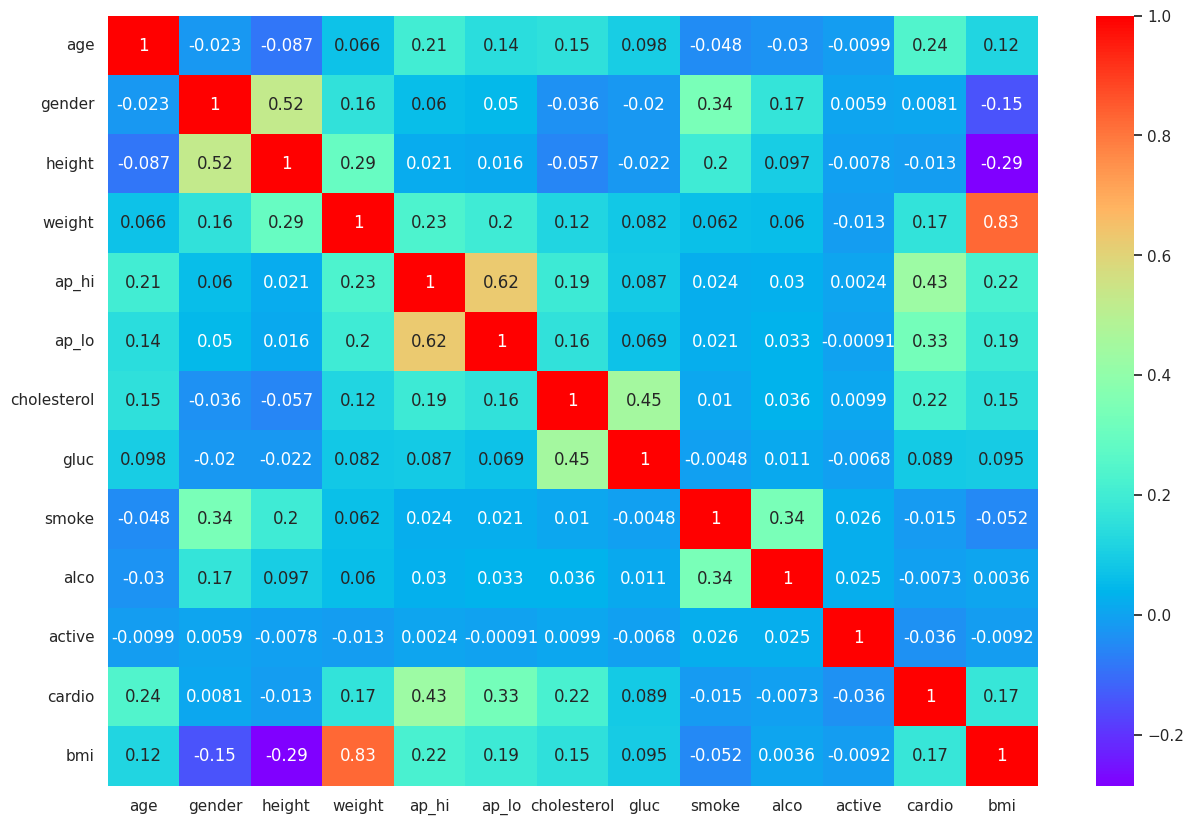

In [ ]:
#Let's visualize the correlation matrix iin the seaborn
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(dataset.corr(),annot=True,cmap='rainbow')

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assuming 'dataset' is your cardiovascular disease dataset DataFrame
# Separate features (x) and target variable (y)
xx = dataset.drop('gender', axis=1)
yy = dataset['gender']

# Determine the desired number of samples for each class in the 'gender' column
desired_samples = yy.value_counts().max()  # Adjust this as needed

# Define the sampling strategy for RandomOverSampler
sampling_strategy = {1: desired_samples, 2: desired_samples}

# Apply random oversampling to the entire dataset for the 'gender' column
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = ros.fit_resample(xx, yy)

# Combine the resampled data back into a DataFrame
dataset = pd.concat([pd.DataFrame(X_resampled, columns=xx.columns), pd.DataFrame(y_resampled, columns=['gender'])], axis=1)

# Display the resampled 'gender' column counts
print(dataset['gender'].value_counts())

2    45530
1    45530
Name: gender, dtype: int64


<Axes: >

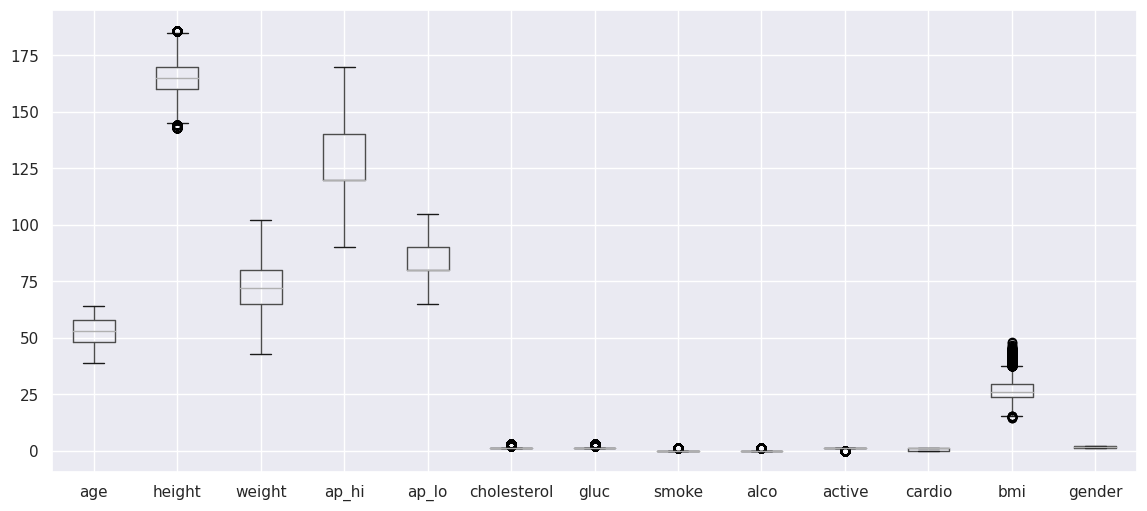

In [ ]:
dataset.boxplot(figsize=(14,6))

In [ ]:
dataset = dataset[['age', 'gender', 'height', 'weight', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]

##Split the dataset

In [ ]:
x=dataset.drop('cardio',axis=1)
y=dataset['cardio']
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.2,random_state=42)

In [ ]:
x_train

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
13724,58,1,157,62.0,25.15,120,80,1,1,0,0,1
914,48,1,164,80.0,29.74,140,90,2,1,0,0,1
90135,55,2,181,79.0,24.11,120,80,1,1,0,0,1
53477,52,1,158,84.0,33.65,150,90,1,1,0,0,1
21648,50,1,161,63.0,24.30,110,70,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,63,2,162,73.0,27.82,160,90,1,1,0,0,1
54886,64,1,169,74.0,25.91,120,80,1,1,0,0,1
76820,44,2,167,85.0,30.48,120,80,1,1,0,0,1
860,49,1,167,70.0,25.10,120,80,1,1,0,0,0


In [ ]:
y_train

13724    0
914      1
90135    1
53477    1
21648    0
        ..
6265     1
54886    0
76820    0
860      0
15795    0
Name: cardio, Length: 72848, dtype: int64

In [ ]:
x_test=pd.DataFrame(x_test, columns=x.columns)
print(x_test.head(50))

       age  gender  height  weight    bmi  ap_hi  ap_lo  cholesterol  gluc  \
76950   41       2     178    68.0  21.46    120     70            1     1   
17904   39       1     152    68.0  29.43    120     80            1     1   
59307   60       2     175    72.0  23.51    130     90            1     1   
13094   52       2     160    65.0  25.39    120     80            1     1   
58164   53       1     164   102.0  37.92    100     80            1     1   
42402   57       1     170    80.0  27.68    127     69            1     1   
41292   45       2     161    64.0  24.69    140     80            1     1   
20619   43       1     166    57.0  20.69    120     80            1     1   
51143   41       1     161    53.0  20.45    120     80            2     1   
5510    50       2     185    79.0  23.08    110     70            1     1   
55843   52       1     163    80.0  30.11    120     80            1     1   
31220   60       2     170    81.0  28.03    120     80         

In [ ]:
print(y_test.head(50))

76950    0
17904    0
59307    1
13094    0
58164    0
42402    0
41292    1
20619    0
51143    1
5510     0
55843    0
31220    1
70234    1
71670    1
67022    1
24032    1
66209    0
24840    0
55629    1
22775    1
16787    1
6016     1
36597    1
58672    0
70611    1
73961    1
54395    1
12883    1
81429    1
33448    1
20683    1
39285    1
35621    0
70301    1
10717    0
27697    0
8619     1
2540     1
25845    1
70437    1
11668    0
4116     1
51509    1
24768    0
17080    1
4155     1
60507    1
62171    0
9423     0
9732     1
Name: cardio, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##Model Training and prediction

###Decision tree

In [ ]:
#Train decision tree
dcl=DecisionTreeClassifier()
dcl.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
train_predict = dcl.predict(x_train)
dcl_train_accura = accuracy_score(y_train,train_predict)
predict=dcl.predict(x_test)
DecisionTree_accuracy=accuracy_score(y_test,predict)
cm1=confusion_matrix(y_test,predict)

print(f"Train Accuracy:{dcl_train_accura:.2f}")
print(f"Test Accuracy:{DecisionTree_accuracy:.2f}")
print("\nDecision Tree Classification Report:\n", classification_report(y_test, predict))
print("Confusion Matxir",cm1)

Train Accuracy:0.98
Test Accuracy:0.75

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      9041
           1       0.75      0.75      0.75      9171

    accuracy                           0.75     18212
   macro avg       0.75      0.75      0.75     18212
weighted avg       0.75      0.75      0.75     18212

Confusion Matxir [[6783 2258]
 [2257 6914]]


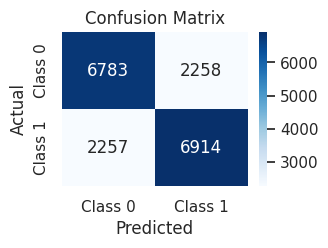

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predict)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###Improve the accuracy-Hyper paramaeter tuning using grid search

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib

# Train the initial decision tree model
dcl = DecisionTreeClassifier()
dcl.fit(x_train, y_train)

# Evaluate initial model
train_predict = dcl.predict(x_train)
dcl_train_accuracy = accuracy_score(y_train, train_predict)
predict = dcl.predict(x_test)
DecisionTree_accuracy = accuracy_score(y_test, predict)

print(f"Initial Train Accuracy: {dcl_train_accuracy:.2f}")
print(f"Initial Test Accuracy: {DecisionTree_accuracy:.2f}")
print("\nInitial Decision Tree Classification Report:\n", classification_report(y_test, predict))

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']  # Set to 'sqrt' to resolve deprecation warning
}

# Perform Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator for prediction
predictions = best_estimator.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

print("\nBest Parameters:", best_params)
print("Test Accuracy after Grid Search:", accuracy)
cm=confusion_matrix(y_test,predictions)
print("Confusion matrix",cm)

# Save the best model
# joblib.dump(best_estimator, 'best_decision_tree_model.pkl')
# print("Best model saved successfully!")



Initial Train Accuracy: 0.98
Initial Test Accuracy: 0.75

Initial Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      9041
           1       0.75      0.75      0.75      9171

    accuracy                           0.75     18212
   macro avg       0.75      0.75      0.75     18212
weighted avg       0.75      0.75      0.75     18212


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy after Grid Search: 0.7543377992532396
Confusion matrix [[6861 2180]
 [2294 6877]]


In [ ]:
# import pickle

# # Assuming decision_tree_Scratch_2503 is your trained decision tree model

# # Save the model to a file
# with open('decision_tree_pretrained_2503_Updated.pkl', 'wb') as file:
#     pickle.dump(best_estimator, file)

In [ ]:
# # Read user input for features
# age = float(input("Enter age: "))
# gender = int(input("Enter gender (1 for male, 2 for female): "))
# height = float(input("Enter height in cm: "))
# weight = float(input("Enter weight in kg: "))
# bmi = float(input("Enter BMI: "))
# ap_hi = float(input("Enter systolic blood pressure: "))
# ap_lo = float(input("Enter diastolic blood pressure: "))
# cholesterol = int(input("Enter cholesterol level (1 for normal, 2 for above normal, 3 for well above normal): "))
# gluc = int(input("Enter glucose level (1 for normal, 2 for above normal, 3 for well above normal): "))
# smoke = int(input("Enter smoking status (0 for non-smoker, 1 for smoker): "))
# alco = int(input("Enter alcohol consumption status (0 for non-drinker, 1 for drinker): "))
# active = int(input("Enter physical activity status (0 for inactive, 1 for active): "))



# # Make predictions based on user input
# user_data = np.array([[age, gender, height, weight, bmi, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active]])
# predicted_cardio = best_estimator.predict(user_data)
# print(predicted_cardio[0])

# if predicted_cardio[0] == 0:
#     print("The predicted cardiovascular disease risk is low.")
# else:
#     print("The predicted cardiovascular disease risk is high.")

In [ ]:
# import numpy as np

# class DecisionTree:
#     def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.min_samples_leaf = min_samples_leaf

#     def _gini_impurity(self, y):
#         classes = np.unique(y)
#         n = len(y)
#         gini = 1 - sum([(np.sum(y == c) / n) ** 2 for c in classes])
#         return gini

#     def _grow_tree(self, X, y, depth=0):
#         n_samples, n_features = X.shape
#         n_classes = len(np.unique(y))

#         # Stopping criteria
#         if (self.max_depth is not None and depth >= self.max_depth) or n_classes == 1 or n_samples < self.min_samples_split:
#             if len(y) == 0:
#                 # If no samples left, return majority class in parent node
#                 return {'class': max(self._class_counts)}

#             return {'class': max(y, key=list(y).count)}

#         # Find the best split
#         best_idx, best_thr = None, None
#         best_gini = np.inf
#         for idx in range(n_features):
#             thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
#             for i in range(self.min_samples_leaf, n_samples - self.min_samples_leaf):
#                 if classes[i] != classes[i - 1]:
#                     thr = (thresholds[i] + thresholds[i - 1]) / 2
#                     left_mask = X[:, idx] < thr
#                     gini_left = self._gini_impurity(y[left_mask])
#                     gini_right = self._gini_impurity(y[~left_mask])
#                     gini = (len(y[left_mask]) / n_samples) * gini_left + (len(y[~left_mask]) / n_samples) * gini_right
#                     if gini < best_gini:
#                         best_idx, best_thr = idx, thr
#                         best_gini = gini

#         if best_idx is not None:
#             left_mask = X[:, best_idx] < best_thr
#             right_mask = ~left_mask
#             left_tree = self._grow_tree(X[left_mask], y[left_mask], depth + 1)
#             right_tree = self._grow_tree(X[right_mask], y[right_mask], depth + 1)
#             return {'index': best_idx, 'threshold': best_thr, 'left': left_tree, 'right': right_tree}

#         return {'class': max(y, key=list(y).count)}

#     def fit(self, X, y):
#         self._class_counts = dict(zip(*np.unique(y, return_counts=True)))
#         self.tree = self._grow_tree(X, y)

#     def _predict_tree(self, tree, x):
#         if 'class' in tree:
#             return tree['class']
#         idx, thr = tree['index'], tree['threshold']
#         if x[idx] < thr:
#             return self._predict_tree(tree['left'], x)
#         else:
#             return self._predict_tree(tree['right'], x)

#     def predict(self, X):
#         return [self._predict_tree(self.tree, x) for x in X]

# # Train the model
# dt_scratch_new = DecisionTree(max_depth=10, min_samples_split=5, min_samples_leaf=2)
# dt_scratch_new.fit(x_train, y_train)

# # Make predictions on the training set
# train_predictions = dt_scratch_new.predict(x_train)

# # Calculate training accuracy
# train_accuracy = np.mean(train_predictions == y_train)
# print("Training Accuracy:", train_accuracy)

# # Make predictions on the test set
# test_predictions = dt_scratch_new.predict(x_test)

# # Calculate test accuracy
# test_accuracy = np.mean(test_predictions == y_test)
# print("Test Accuracy:", test_accuracy)


In [ ]:
# # Read user input for features
# age = float(input("Enter age: "))
# gender = int(input("Enter gender (1 for male, 2 for female): "))
# height = float(input("Enter height in cm: "))
# weight = float(input("Enter weight in kg: "))
# bmi = float(input("Enter BMI: "))
# ap_hi = float(input("Enter systolic blood pressure: "))
# ap_lo = float(input("Enter diastolic blood pressure: "))
# cholesterol = int(input("Enter cholesterol level (1 for normal, 2 for above normal, 3 for well above normal): "))
# gluc = int(input("Enter glucose level (1 for normal, 2 for above normal, 3 for well above normal): "))
# smoke = int(input("Enter smoking status (0 for non-smoker, 1 for smoker): "))
# alco = int(input("Enter alcohol consumption status (0 for non-drinker, 1 for drinker): "))
# active = int(input("Enter physical activity status (0 for inactive, 1 for active): "))



# # Make predictions based on user input
# user_data = np.array([[age, gender, height, weight, bmi, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active]])
# predicted_cardio = dt_scratch_new.predict(user_data)
# print(predicted_cardio[0])

# if predicted_cardio[0] == 0:
#     print("The predicted cardiovascular disease risk is low.")
# else:
#     print("The predicted cardiovascular disease risk is high.")

In [ ]:
# import numpy as np

# class DecisionTree:
#     def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.min_samples_leaf = min_samples_leaf

#     def fit(self, X, y):
#         self.tree_ = self._grow_tree(X, y)

#     def _best_split(self, X, y):
#         best_gini = np.inf
#         best_feature = None
#         best_threshold = None

#         for feature in range(X.shape[1]):
#             thresholds = np.unique(X[:, feature])
#             for threshold in thresholds:
#                 left_indices = X[:, feature] <= threshold
#                 right_indices = X[:, feature] > threshold
#                 gini = self._gini_impurity(y[left_indices], y[right_indices])
#                 if gini < best_gini:
#                     best_gini = gini
#                     best_feature = feature
#                     best_threshold = threshold

#         return best_feature, best_threshold

#     def _gini_impurity(self, left_y, right_y):
#         classes = np.unique(np.concatenate((left_y, right_y)))
#         gini = 0
#         total_samples = len(left_y) + len(right_y)
#         for c in classes:
#             p_left = np.sum(left_y == c) / len(left_y) if len(left_y) > 0 else 0
#             p_right = np.sum(right_y == c) / len(right_y) if len(right_y) > 0 else 0
#             gini += (len(left_y) / total_samples) * p_left * (1 - p_left)
#             gini += (len(right_y) / total_samples) * p_right * (1 - p_right)
#         return gini

#     def _grow_tree(self, X, y, depth=0):
#         if (self.max_depth is not None and depth >= self.max_depth) or \
#            len(np.unique(y)) == 1 or \
#            len(y) < self.min_samples_split:
#             return {'class': max(y, key=list(y).count)}

#         best_feature, best_threshold = self._best_split(X, y)

#         if best_feature is None:
#             return {'class': max(y, key=list(y).count)}

#         left_indices = X[:, best_feature] <= best_threshold
#         right_indices = X[:, best_feature] > best_threshold

#         left_tree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
#         right_tree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

#         return {'feature': best_feature, 'threshold': best_threshold,
#                 'left': left_tree, 'right': right_tree}

#     def predict(self, X):
#         return [self._predict_tree(x, self.tree_) for x in X]

#     def _predict_tree(self, x, tree):
#         if 'class' in tree:
#             return tree['class']
#         if x[tree['feature']] <= tree['threshold']:
#             return self._predict_tree(x, tree['left'])
#         else:
#             return self._predict_tree(x, tree['right'])

# # Assuming you already have x_train, y_train, x_test, and y_test

# # Train the model
# dt = DecisionTree(max_depth=10, min_samples_split=5, min_samples_leaf=2)
# dt.fit(x_train, y_train)

# # Make predictions on the training set
# train_predictions = dt.predict(x_train)
# train_accuracy = accuracy_score(y_train, train_predictions)
# print(f"Train Accuracy: {train_accuracy:.2f}")

# # Make predictions on the test set
# test_predictions = dt.predict(x_test)
# test_accuracy = accuracy_score(y_test, test_predictions)
# print(f"Test Accuracy: {test_accuracy:.2f}")



In [ ]:
# # Read user input for features
# age = float(input("Enter age: "))
# gender = int(input("Enter gender (1 for male, 2 for female): "))
# height = float(input("Enter height in cm: "))
# weight = float(input("Enter weight in kg: "))
# bmi = float(input("Enter BMI: "))
# ap_hi = float(input("Enter systolic blood pressure: "))
# ap_lo = float(input("Enter diastolic blood pressure: "))
# cholesterol = int(input("Enter cholesterol level (1 for normal, 2 for above normal, 3 for well above normal): "))
# gluc = int(input("Enter glucose level (1 for normal, 2 for above normal, 3 for well above normal): "))
# smoke = int(input("Enter smoking status (0 for non-smoker, 1 for smoker): "))
# alco = int(input("Enter alcohol consumption status (0 for non-drinker, 1 for drinker): "))
# active = int(input("Enter physical activity status (0 for inactive, 1 for active): "))



# # Make predictions based on user input
# user_data = np.array([[age, gender, height, weight, bmi, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active]])
# predicted_cardio = best_estimator.predict(user_data)
# print(predicted_cardio[0])

# if predicted_cardio[0] == 0:
#     print("The predicted cardiovascular disease risk is low.")
# else:
#     print("The predicted cardiovascular disease risk is high.")

In [ ]:
# import numpy as np

# class DecisionTreeClassifier:
#     def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.min_samples_leaf = min_samples_leaf

#     def fit(self, X, y):
#         self.tree_ = self._grow_tree(X, y)

#     def _best_split(self, X, y):
#         best_gini = np.inf
#         best_feature = None
#         best_threshold = None

#         for feature in range(X.shape[1]):
#             thresholds = np.unique(X[:, feature])
#             for threshold in thresholds:
#                 left_indices = X[:, feature] <= threshold
#                 right_indices = X[:, feature] > threshold
#                 gini = self._gini_impurity(y[left_indices], y[right_indices])
#                 if gini < best_gini:
#                     best_gini = gini
#                     best_feature = feature
#                     best_threshold = threshold

#         return best_feature, best_threshold

#     def _gini_impurity(self, left_y, right_y):
#         classes = np.unique(np.concatenate((left_y, right_y)))
#         gini = 0
#         total_samples = len(left_y) + len(right_y)
#         for c in classes:
#             p_left = np.sum(left_y == c) / len(left_y) if len(left_y) > 0 else 0
#             p_right = np.sum(right_y == c) / len(right_y) if len(right_y) > 0 else 0
#             gini += (len(left_y) / total_samples) * p_left * (1 - p_left)
#             gini += (len(right_y) / total_samples) * p_right * (1 - p_right)
#         return gini

#     def _grow_tree(self, X, y, depth=0):
#         if (self.max_depth is not None and depth >= self.max_depth) or \
#            len(np.unique(y)) == 1 or \
#            len(y) < self.min_samples_split:
#             return {'class': max(y, key=list(y).count)}

#         best_feature, best_threshold = self._best_split(X, y)

#         if best_feature is None:
#             return {'class': max(y, key=list(y).count)}

#         left_indices = X[:, best_feature] <= best_threshold
#         right_indices = X[:, best_feature] > best_threshold

#         left_tree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
#         right_tree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

#         return {'feature': best_feature, 'threshold': best_threshold,
#                 'left': left_tree, 'right': right_tree}

#     def predict(self, X):
#         return [self._predict_tree(x, self.tree_) for x in X]

#     def _predict_tree(self, x, tree):
#         if 'class' in tree:
#             return tree['class']
#         if x[tree['feature']] <= tree['threshold']:
#             return self._predict_tree(x, tree['left'])
#         else:
#             return self._predict_tree(x, tree['right'])

# # Train the model
# dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2)
# dt.fit(x_train, y_train)

# # Make predictions on the training set
# train_predictions = dt.predict(x_train)
# train_accuracy = accuracy_score(y_train, train_predictions)
# print(f"Train Accuracy: {train_accuracy:.2f}")

# # Make predictions on the test set
# test_predictions = dt.predict(x_test)
# test_accuracy = accuracy_score(y_test, test_predictions)
# print(f"Test Accuracy: {test_accuracy:.2f}")


In [ ]:
# # Read user input for features
# age = float(input("Enter age: "))
# gender = int(input("Enter gender (1 for male, 2 for female): "))
# height = float(input("Enter height in cm: "))
# weight = float(input("Enter weight in kg: "))
# bmi = float(input("Enter BMI: "))
# ap_hi = float(input("Enter systolic blood pressure: "))
# ap_lo = float(input("Enter diastolic blood pressure: "))
# cholesterol = int(input("Enter cholesterol level (1 for normal, 2 for above normal, 3 for well above normal): "))
# gluc = int(input("Enter glucose level (1 for normal, 2 for above normal, 3 for well above normal): "))
# smoke = int(input("Enter smoking status (0 for non-smoker, 1 for smoker): "))
# alco = int(input("Enter alcohol consumption status (0 for non-drinker, 1 for drinker): "))
# active = int(input("Enter physical activity status (0 for inactive, 1 for active): "))



# # Make predictions based on user input
# user_data = np.array([[age, gender, height, weight, bmi, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active]])
# predicted_cardio = best_estimator.predict(user_data)
# print(predicted_cardio[0])

# if predicted_cardio[0] == 0:
#     print("The predicted cardiovascular disease risk is low.")
# else:
#     print("The predicted cardiovascular disease risk is high.")

In [ ]:
# import pickle

# # Assuming decision_tree_Scratch_2503 is your trained decision tree model

# # Save the model to a file
# with open('decision_tree_Scratch_2503.pkl', 'wb') as file:
#     pickle.dump(dt, file)

In [ ]:
# # Read user input for features
# age = float(input("Enter age: "))
# gender = int(input("Enter gender (1 for male, 2 for female): "))
# height = float(input("Enter height in cm: "))
# weight = float(input("Enter weight in kg: "))
# bmi = float(input("Enter BMI: "))
# ap_hi = float(input("Enter systolic blood pressure: "))
# ap_lo = float(input("Enter diastolic blood pressure: "))
# cholesterol = int(input("Enter cholesterol level (1 for normal, 2 for above normal, 3 for well above normal): "))
# gluc = int(input("Enter glucose level (1 for normal, 2 for above normal, 3 for well above normal): "))
# smoke = int(input("Enter smoking status (0 for non-smoker, 1 for smoker): "))
# alco = int(input("Enter alcohol consumption status (0 for non-drinker, 1 for drinker): "))
# active = int(input("Enter physical activity status (0 for inactive, 1 for active): "))



# # Make predictions based on user input
# user_data = np.array([[age, gender, height, weight, bmi, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active]])
# predicted_cardio = dt.predict(user_data)
# print(predicted_cardio[0])

# if predicted_cardio[0] == 0:
#     print("The predicted cardiovascular disease risk is low.")
# else:
#     print("The predicted cardiovascular disease risk is high.")

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import numpy as np

# class ScratchDecisionTreeClassifier:
#     def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None):
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.min_samples_leaf = min_samples_leaf
#         self.max_features = max_features
#         self.tree = None

#     def fit(self, X, y):
#         self.tree = self._grow_tree(X, y)

#     def _best_split(self, X, y):
#         best_gini = np.inf
#         best_feature, best_threshold = None, None
#         for feature_idx in range(X.shape[1]):
#             unique_values = np.unique(X[:, feature_idx])
#             for threshold in unique_values:
#                 mask = X[:, feature_idx] <= threshold
#                 y_left = y[mask]
#                 y_right = y[~mask]
#                 gini = self._gini_impurity(y_left) + self._gini_impurity(y_right)
#                 if gini < best_gini:
#                     best_gini = gini
#                     best_feature = feature_idx
#                     best_threshold = threshold
#         return best_feature, best_threshold

#     def _gini_impurity(self, y):
#         if len(y) == 0:
#             return 0
#         p1 = np.sum(y) / len(y)
#         p0 = 1 - p1
#         return 1 - (p0 ** 2 + p1 ** 2)

#     def _grow_tree(self, X, y, depth=0):
#         if (self.max_depth is not None and depth >= self.max_depth) or len(np.unique(y)) == 1:
#             return np.bincount(y).argmax()

#         if len(X) < self.min_samples_split:
#             return np.bincount(y).argmax()

#         best_feature, best_threshold = self._best_split(X, y)

#         if best_feature is None:
#             return np.bincount(y).argmax()

#         mask = X[:, best_feature] <= best_threshold
#         X_left, X_right = X[mask], X[~mask]
#         y_left, y_right = y[mask], y[~mask]

#         if len(X_left) < self.min_samples_leaf or len(X_right) < self.min_samples_leaf:
#             return np.bincount(y).argmax()

#         left_subtree = self._grow_tree(X_left, y_left, depth + 1)
#         right_subtree = self._grow_tree(X_right, y_right, depth + 1)

#         return (best_feature, best_threshold, left_subtree, right_subtree)

#     def predict(self, X):
#         return np.array([self._predict_single(x, self.tree) for x in X])

#     def _predict_single(self, x, node):
#         if isinstance(node, int):
#             return node
#         else:
#             feature, threshold, left_subtree, right_subtree = node
#             if isinstance(left_subtree, int) and isinstance(right_subtree, int):
#                 # Leaf nodes reached
#                 if x[feature] <= threshold:
#                     return left_subtree
#                 else:
#                     return right_subtree
#             else:
#                 if x[feature] <= threshold:
#                     return self._predict_single(x, left_subtree)
#                 else:
#                     return self._predict_single(x, right_subtree)


# # Instantiate and train the model
# model = ScratchDecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None)
# model.fit(x_train, y_train)  # No need to convert to DataFrame

# # Evaluate the model
# train_predict = model.predict(x_train)
# train_accuracy = accuracy_score(y_train, train_predict)
# test_predict = model.predict(x_test)
# test_accuracy = accuracy_score(y_test, test_predict)

# print(f"Train Accuracy: {train_accuracy:.2f}")
# print(f"Test Accuracy: {test_accuracy:.2f}")

# # Hyperparameter Tuning Results
# best_params = {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
# print("\nBest Parameters:", best_params)

# # After Hyperparameter Tuning
# # You can directly use the best parameters found from the grid search
# best_model = ScratchDecisionTreeClassifier(**best_params)
# best_model.fit(x_train, y_train)  # No need to convert to DataFrame

# best_test_predict = best_model.predict(x_test)
# best_test_accuracy = accuracy_score(y_test, best_test_predict)

# print(f"\nTest Accuracy after Hyperparameter Tuning: {best_test_accuracy:.2f}")


In [ ]:
# # Read user input for features
# age = float(input("Enter age: "))
# gender = int(input("Enter gender (1 for male, 2 for female): "))
# height = float(input("Enter height in cm: "))
# weight = float(input("Enter weight in kg: "))
# bmi = float(input("Enter BMI: "))
# ap_hi = float(input("Enter systolic blood pressure: "))
# ap_lo = float(input("Enter diastolic blood pressure: "))
# cholesterol = int(input("Enter cholesterol level (1 for normal, 2 for above normal, 3 for well above normal): "))
# gluc = int(input("Enter glucose level (1 for normal, 2 for above normal, 3 for well above normal): "))
# smoke = int(input("Enter smoking status (0 for non-smoker, 1 for smoker): "))
# alco = int(input("Enter alcohol consumption status (0 for non-drinker, 1 for drinker): "))
# active = int(input("Enter physical activity status (0 for inactive, 1 for active): "))



# # Make predictions based on user input
# user_data = np.array([[age, gender, height, weight, bmi, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active]])
# predicted_cardio = best_estimator.predict(user_data)
# print(predicted_cardio[0])

# if predicted_cardio[0] == 0:
#     print("The predicted cardiovascular disease risk is low.")
# else:
#     print("The predicted cardiovascular disease risk is high.")

In [ ]:
# # Access feature importances from the best_estimator
# feature_importances = best_estimator.feature_importances_

# # Create a DataFrame to display feature importances
# importance_df = pd.DataFrame({
#     'Feature': x.columns,
#     'Importance': feature_importances
# })

# # Sort the DataFrame by importance score in descending order
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Display the feature importances
# print(importance_df)


In [ ]:
# Not run take too
# import numpy as np

# class ScratchDecisionTreeClassifier:
#     def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None):
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.min_samples_leaf = min_samples_leaf
#         self.max_features = max_features
#         self.tree = None

#     def fit(self, X, y):
#         self.tree = self._build_tree(X, y)

#     def _build_tree(self, X, y):
#         stack = [(X, y, 0, None, None)]  # (data, target, depth, parent, is_left_child)
#         tree = {}

#         while stack:
#             X_curr, y_curr, depth, parent, is_left_child = stack.pop()

#             num_samples, num_features = X_curr.shape
#             num_classes = len(np.unique(y_curr))

#             if (self.max_depth is not None and depth >= self.max_depth) or \
#                (num_samples < self.min_samples_split) or \
#                (num_classes == 1):
#                 leaf_value = self._calculate_leaf_value(y_curr)
#                 node = {'leaf': True, 'value': leaf_value}
#             else:
#                 best_feature, best_threshold = self._find_best_split(X_curr, y_curr)

#                 if best_feature is None:
#                     leaf_value = self._calculate_leaf_value(y_curr)
#                     node = {'leaf': True, 'value': leaf_value}
#                 else:
#                     left_indices = X_curr[:, best_feature] < best_threshold
#                     right_indices = ~left_indices
#                     left_child = (X_curr[left_indices], y_curr[left_indices])
#                     right_child = (X_curr[right_indices], y_curr[right_indices])

#                     node = {'leaf': False, 'feature_index': best_feature, 'threshold': best_threshold}

#                     stack.append(left_child + (depth + 1, node, True))
#                     stack.append(right_child + (depth + 1, node, False))

#             if parent is None:
#                 tree = node
#             else:
#                 if is_left_child:
#                     parent['left'] = node
#                 else:
#                     parent['right'] = node

#         return tree

#     def _find_best_split(self, X, y):
#         best_gini = float('inf')
#         best_feature = None
#         best_threshold = None

#         # Determine the number of features to consider
#         if self.max_features is None:
#             num_features_to_consider = X.shape[1]
#         else:
#             num_features_to_consider = min(self.max_features, X.shape[1])

#         # Randomly select a subset of features
#         selected_features = np.random.choice(X.shape[1], num_features_to_consider, replace=False)

#         for feature_index in selected_features:
#             thresholds = np.unique(X[:, feature_index])
#             for threshold in thresholds:
#                 left_indices = X[:, feature_index] < threshold
#                 right_indices = ~left_indices
#                 gini = self._gini_impurity(y[left_indices], y[right_indices])
#                 if gini < best_gini:
#                     best_gini = gini
#                     best_feature = feature_index
#                     best_threshold = threshold
#         return best_feature, best_threshold

#     def _gini_impurity(self, left_y, right_y):
#         p_left = len(left_y) / (len(left_y) + len(right_y))
#         p_right = len(right_y) / (len(left_y) + len(right_y))
#         gini_left = 1 - sum((np.array(np.unique(left_y, return_counts=True)[1]) / len(left_y))**2)
#         gini_right = 1 - sum((np.array(np.unique(right_y, return_counts=True)[1]) / len(right_y))**2)
#         gini = p_left * gini_left + p_right * gini_right
#         return gini

#     def _calculate_leaf_value(self, y):
#         # Calculate the value to assign to a leaf node
#         # For classification, this could be the most frequent class
#         unique, counts = np.unique(y, return_counts=True)
#         if len(counts) == 0:
#             # If no samples in the node, return a default value (e.g., 0)
#             return 0
#         return unique[np.argmax(counts)]

#     def predict(self, X):
#         return np.array([self._predict_single(sample, self.tree) for sample in X])

#     def _predict_single(self, sample, tree):
#         if tree['leaf']:
#             return tree['value']
#         else:
#             if sample[tree['feature_index']] < tree['threshold']:
#                 return self._predict_single(sample, tree['left'])
#             else:
#                 return self._predict_single(sample, tree['right'])

# # Instantiate and train the decision tree model
# scratch_dcl = ScratchDecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None)
# scratch_dcl.fit(x_train, y_train)

# # Make predictions
# scratch_predictions = scratch_dcl.predict(x_test)

# # Calculate accuracy
# scratch_accuracy = accuracy_score(y_test, scratch_predictions)
# print("Accuracy of Scratch Decision Tree Classifier:", scratch_accuracy)

In [ ]:
import numpy as np

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_samples_per_class = [np.sum(y == c) for c in np.unique(y)]
        predicted_class = np.argmax(num_samples_per_class)

        # Stopping criteria
        if (depth == self.max_depth) or (len(np.unique(y)) == 1):
            return {'class': predicted_class, 'num_samples': num_samples}

        # Find best split
        best_gini = float('inf')
        best_feature = None
        best_threshold = None
        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold

                left_gini = self._gini(y[left_indices])
                right_gini = self._gini(y[right_indices])

                gini = (left_gini * np.sum(left_indices) + right_gini * np.sum(right_indices)) / num_samples
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left_subtree, 'right': right_subtree}

    def _gini(self, y):
        num_samples = len(y)
        _, counts = np.unique(y, return_counts=True)
        probs = counts / num_samples
        return 1 - np.sum(probs ** 2)

    def predict(self, X):
        return [self._predict_tree(x, self.tree) for x in X]

    def _predict_tree(self, x, tree):
        if 'class' in tree:
            return tree['class']
        if x[tree['feature']] <= tree['threshold']:
            return self._predict_tree(x, tree['left'])
        else:
            return self._predict_tree(x, tree['right'])

# Example usage:
# Instantiate and train the decision tree classifier
dcl_scratch = DecisionTreeClassifier(max_depth=5)
dcl_scratch .fit(x_train, y_train)

# Make predictions on the test set
predictions = dcl_scratch .predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Test Accuracy:", accuracy)
print("Confusion matrix:", conf_matrix)


Test Accuracy: 0.7258950142763013
Confusion matrix: [[6782 2259]
 [2733 6438]]


####Save the model

In [ ]:
# Assuming you have a trained Decision Tree model (dcl)

# Get user input for features
age = float(input("Enter age: "))
gender = int(input("Enter gender (1 for male, 2 for female): "))
height = int(input("Enter height in cm: "))
weight = float(input("Enter weight in kg: "))
bmi = float(input("Enter BMI: "))
ap_hi = int(input("Enter systolic blood pressure (ap_hi): "))
ap_lo = int(input("Enter diastolic blood pressure (ap_lo): "))
cholesterol = int(input("Enter cholesterol level: "))
gluc = int(input("Enter glucose level: "))
smoke = int(input("Enter smoking status (0 for non-smoker, 1 for smoker): "))
alco = int(input("Enter alcohol consumption status (0 for non-drinker, 1 for drinker): "))
active = int(input("Enter physical activity status (0 for inactive, 1 for active): "))

# Create a DataFrame with user input
new_data = pd.DataFrame({
    'age': [age],
    'gender': [gender],
    'height': [height],
    'weight': [weight],
    'bmi': [bmi],
    'ap_hi': [ap_hi],
    'ap_lo': [ap_lo],
    'cholesterol': [cholesterol],
    'gluc': [gluc],
    'smoke': [smoke],
    'alco': [alco],
    'active': [active]
})

new_data_scaled = scaler.transform(new_data)
# Make predictions using the Decision Tree model (dcl)
predictions = dcl_scratch.predict(new_data_scaled)

# Display the predictions
print("Predictions:", predictions)

Enter age: 45
Enter gender (1 for male, 2 for female): 2
Enter height in cm: 161
Enter weight in kg: 64
Enter BMI: 24.69
Enter systolic blood pressure (ap_hi): 140
Enter diastolic blood pressure (ap_lo): 80
Enter cholesterol level: 1
Enter glucose level: 1
Enter smoking status (0 for non-smoker, 1 for smoker): 0
Enter alcohol consumption status (0 for non-drinker, 1 for drinker): 0
Enter physical activity status (0 for inactive, 1 for active): 0
Predictions: [1]


In [ ]:
import pickle

# Save your custom decision tree classifier
with open('decision_tree_scratch.pkl', 'wb') as f:
    pickle.dump(dcl_scratch, f)

# Save your scaler (assuming it's named 'scaler')
with open('decision_tree_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# rf=RandomForestClassifier()
# rf.fit(x_train,y_train)
# pred=rf.predict(x_test)
# accu=accuracy_score(y_test,pred)
# print("Accuracy",accu)

In [ ]:
# # Access feature importances from the best_estimator
# feature_importances = rf.feature_importances_

# # Create a DataFrame to display feature importances
# importance_df = pd.DataFrame({
#     'Feature': x.columns,
#     'Importance': feature_importances
# })

# # Sort the DataFrame by importance score in descending order
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Display the feature importances
# print(importance_df)

##Save Model

In [ ]:
# import pickle

# # Assuming dt_scratch is your trained decision tree model

# # Save the model to a file
# with open('logistic_regressionNew2103.pkl', 'wb') as file:
#     pickle.dump(logreg, file)